# Libraries 

In [1]:
import os
import numpy as np 
import pandas as pd 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split

# Dataset import 
Import the dataset and set the column names

In [2]:
dataset = pd.read_csv("/kaggle/input/iris-dataset/iris_data.csv", 
                      header=None,
                      names=["sepal length","sepal width","petal length","petal width","class"])
dataset.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,10.0,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Data cleaning

## Checking for blank values

### Sepal length

In [3]:
null_sl = dataset["sepal length"].isnull().sum()
print("Number of missing sepal lengths: ", null_sl)

Number of missing sepal lengths:  3


### Sepal width

In [4]:
null_sw = dataset["sepal width"].isnull().sum()
print("Number of missing sepal widths: ", null_sw)

Number of missing sepal widths:  3


### Petal length

In [5]:
null_pl = dataset["petal length"].isnull().sum()
print("Number of missing petal lengths: ", null_pl)

Number of missing petal lengths:  3


### Petal width

In [6]:
null_pw = dataset["petal width"].isnull().sum()
print("Number of missing petal widths: ", null_pw)

Number of missing petal widths:  2


### Classes 

In [7]:
null_classes = dataset["class"].isnull().sum()
print("Number of missing classes: ", null_classes)

Number of missing classes:  3


## Calculating means (Numeric fields)

In [8]:
sl_means = np.mean(dataset["sepal length"])
sw_means = np.mean(dataset["sepal width"])
pl_means = np.mean(dataset["petal length"])
pw_means = np.mean(dataset["petal width"])
# Display the results
print(f"Mean values for the respective fields: \nSepal length: {sl_means}\nSepal width: {sw_means}\nPetal length: {pl_means}\nPetal width: {pw_means}")

Mean values for the respective fields: 
Sepal length: 5.908843537414968
Sepal width: 3.138775510204083
Petal length: 3.8367346938775535
Petal width: 1.197297297297298


## Replacing null values by the mean (Numeric fields)

In [9]:
dataset.loc[dataset["sepal length"].isnull(),"sepal length"] = round(sl_means,1)
dataset.loc[dataset["sepal width"].isnull(),"sepal width"] = round(sw_means,1)
dataset.loc[dataset["petal length"].isnull(),"petal length"] = round(pl_means,1)
dataset.loc[dataset["petal width"].isnull(),"petal width"] = round(pw_means,1)

### Results 

In [10]:
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           3
dtype: int64

## Discarding rows with a missing target value

In [11]:
dataset = dataset.dropna()

### Results

In [12]:
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

## Saving the new dataset (optional)

In [13]:
dataset.to_csv("cleaned_dataset.csv", index=False)

# K-Means 

## Construct the dataset

In [14]:
dataset_KMeans = dataset.drop(columns=["class"])
dataset_KMeans.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,10.0,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Model

Parameters : 
- **n_clusters :** The number of clusters to form 
- **random_state :** The random number generated for centroid initialization

Generating 2 clusters gave us the best model). However, feel free to experiment with new parameters. 

In [15]:
kmeans_model = KMeans(n_clusters=2, random_state=0, verbose=0).fit(dataset_KMeans)

### Getting the labels

In [16]:
labels = kmeans_model.labels_

## Assigning the labels to our dataset

In [17]:
dataset_KMeans["cluster_kmeans"] = labels 
dataset_KMeans.head(10)

,sepal length,sepal width,petal length,petal width,cluster_kmeans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,10.0,0.2,1
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Visualizing the results

### 2D Visualization

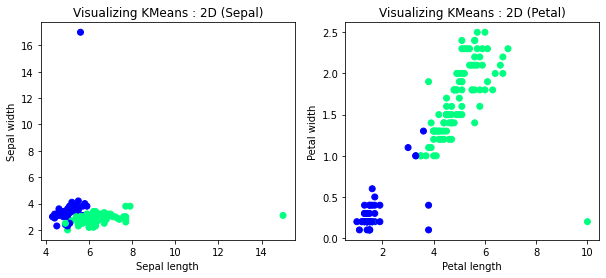

In [18]:
# Create the figure
plt.figure(figsize=(10,4))

# Set the title for the left figure
plt.subplot(1,2,1)
plt.title("Visualizing KMeans : 2D (Sepal)")
# Set the horizontal labels
plt.xlabel("Sepal length")
# Set the vertical labels
plt.ylabel("Sepal width")
# Plot the data
plt.scatter(
            x=dataset_KMeans.to_numpy()[:,0],
            y=dataset_KMeans.to_numpy()[:,1],
            cmap=plt.get_cmap("winter"), 
            c=labels)

# Set the title for the right figure
plt.subplot(1,2,2)
plt.title("Visualizing KMeans : 2D (Petal)")
# Set the horizontal labels
plt.xlabel("Petal length")
# Set the vertical labels
plt.ylabel("Petal width")
# Plot the data
plt.scatter(
            x=dataset_KMeans.to_numpy()[:,2],
            y=dataset_KMeans.to_numpy()[:,3],
            cmap=plt.get_cmap("winter"), 
            c=labels)

plt.show()

### 3D Visualization
Parameters : 
- **elev :** Elevation viewing angle 
- **azim :** Azimuthal viewing angle 

In [19]:
# Import the 3D Viz module
from mpl_toolkits.mplot3d import Axes3D

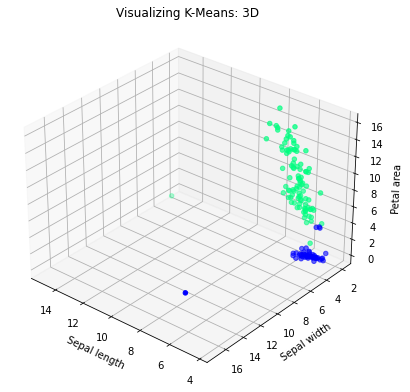

In [20]:
# Create the figure
fig = plt.figure(1,figsize=(6,5))

# Create the 3D axis
ax = Axes3D(fig, 
            rect=[0, 0, .95, 1], 
            elev=30, 
            azim=130, 
            auto_add_to_figure=False)

# Set the labels 
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal area")

# Create the visual (petal area = petal width * petal length)
ax.scatter(dataset_KMeans.to_numpy()[:,0], 
           dataset_KMeans.to_numpy()[:,1], 
           dataset_KMeans.to_numpy()[:,2] * dataset_KMeans.to_numpy()[:,3],
           cmap=plt.get_cmap("winter"), 
           c=labels)

# Add the plot to the figure
fig.add_axes(ax)

plt.title("Visualizing K-Means: 3D")
plt.show()

# Decision Tree

### Defining X (input) and Y (target)

- **X =** independent variables  ---> **input**
- **Y =** dependent variable (target) ---> **output**, what we're trying to predict

### X  = sepal length, sepal width, petal length, petal width

In [21]:
X = dataset_KMeans.to_numpy()[:,0:4]
X[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Y = class

In [22]:
Y = dataset_KMeans.to_numpy()[:,4]
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Train/test split
In our case, 60% for the training set and 40% for validation. However, feel free to experiment other values. 

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

## Applying the Decision Tree

### Fitting the model

In [24]:
DT_model = tree.DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)

### Predict the results

In [25]:
DT_classes = DT_model.predict(X)

### Displaying the results 

In [26]:
dataset_DT = dataset_KMeans
dataset_DT["DT_class"] = np.uint8(DT_classes)
dataset_DT.head(10)

,sepal length,sepal width,petal length,petal width,cluster_kmeans,DT_class
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
5,5.4,3.9,1.7,0.4,0,0
6,4.6,3.4,1.4,0.3,0,0
7,5.0,3.4,10.0,0.2,1,0
8,4.4,2.9,1.4,0.2,0,0
9,4.9,3.1,1.5,0.1,0,0


## Model evaluation (test set)

In [27]:
DT_score = DT_model.score(X_test,Y_test)
print(f"The average accuracy is: {round(DT_score*100,1)}%.")

The average accuracy is: 94.9%.


## Visualizing the decision tree :

In [28]:
# Get all the columns names expect the target class
decision_tree_columns = dataset.columns.values[0:4]
print(f"Columns names: {decision_tree_columns} \n(Class column excluded)")

Columns names: ['sepal length' 'sepal width' 'petal length' 'petal width'] 
(Class column excluded)


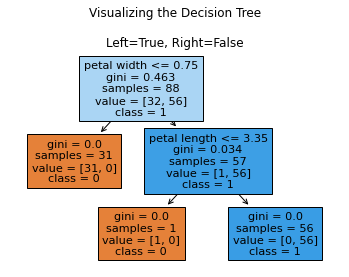

In [29]:
# Create the figure
fig = plt.figure(figsize=(6,4))

# Create the visual
ax = tree.plot_tree(DT_model,
                    feature_names=decision_tree_columns, 
                    class_names=["0","1"], 
                    filled=True)

plt.title("Visualizing the Decision Tree\n\nLeft=True, Right=False")
plt.show()

# Thank you for your time 😄